# Labeling: Raw Returns

![image_example](img/Raw_returns_distribution.png)
_*Fig. 1:*_ Distribution of daily logarithmic returns for MSFT between Jan 2010 and May 2020.


## Abstract

Labeling data by raw returns is the most simple and basic method of labeling financial data for machine learning. Raw returns can be calculated either on a simple or logarithmic basis. Using returns rather than prices is usually preferred for financial time series data because returns are usually stationary, unlike prices. This means that returns across different assets, or the same asset at different times, can be directly compared with each other. The same cannot be said of price differences, since the magnitude of the price change is highly dependent on the preceding price, which varies with time.


## How it works

The simple raw return for an observation with
price $p_t$ at time $t$ relative to its price at time $t-1$ is as follows:

$$
    r_t = \frac{p_{t}}{p_{t-1}} - 1
$$

The logarithmic return is:

$$
    r_t = log(p_t) - log(p_{t-1})
$$

If categorical labels are desired:

$$
     \begin{equation}
     \begin{split}
       L_{t} = \begin{cases}
       -1 &\ \text{if} \ \ r_t < 0\\
       0 &\ \text{if} \ \ r_t = 0\\
       1 &\ \text{if} \ \ r_t > 0
       \end{cases}
     \end{split}
     \end{equation}
$$

If desired, the user can specify a resampling period to apply to the price data prior to calculating returns. The user
can also lag the returns to make them forward-looking.

---
## Examples of use

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf

from mlfinlab.labeling import raw_return

import matplotlib.pyplot as plt

In [2]:
# Load price data
msft = yf.Ticker('MSFT')
msft_df = msft.history(start='2010-1-1', end ='2020-5-18')

# Subset closing prices
close = msft_df['Close']
close.head()

Date
2010-01-04    24.23
2010-01-05    24.23
2010-01-06    24.09
2010-01-07    23.84
2010-01-08    24.00
Name: Close, dtype: float64

### Daily returns on a stock

The data provided is already in daily close prices, so no resampling is needed. We can plot the distribution of logarithmic returns for MSFT stock from 2010-2020.

Text(0.5, 0, 'Daily Log Return')

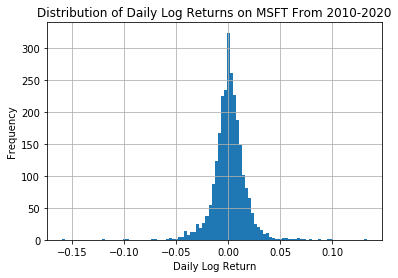

In [3]:
returns1 = raw_return(prices=close, logarithmic=True, lag=False)
ax = returns1.hist(bins=100)
ax.set_title("Distribution of Daily Log Returns on MSFT From 2010-2020")
ax.set_ylabel("Frequency")
ax.set_xlabel("Daily Log Return")

We can also get categorical labels. 

In [4]:
returns2 = raw_return(close, logarithmic=True, binary=True, lag=False)
returns2.value_counts()

 1.0    1358
-1.0    1219
 0.0      32
Name: Close, dtype: int64

We can see that over this time period, MSFT had a positive daily return about 52% of the time and a negative daily return about 47% of the time.

### Resampling by week

Suppose we would rather calculate forward returns per week instead of per day. Then we would need to resample.

Text(0.5, 0, 'Weekly Log Return')

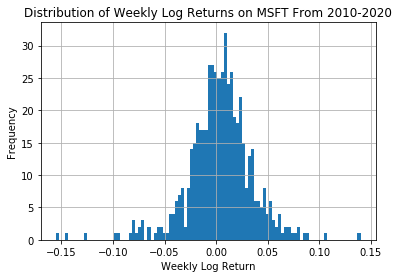

In [5]:
returns3 = raw_return(prices=close, logarithmic=True, resample_by='W', lag=True)
ax2 = returns3.hist(bins=100)
ax2.set_title("Distribution of Weekly Log Returns on MSFT From 2010-2020")
ax2.set_ylabel("Frequency")
ax2.set_xlabel("Weekly Log Return")

In [6]:
returns4 = raw_return(prices=close, binary=True, logarithmic=True, resample_by='W', lag=True)
returns4.value_counts()

 1.0    312
-1.0    224
 0.0      4
Name: Close, dtype: int64

---
## Conclusion

This notebook presents the raw returns labeling method, which is the most basic and ubiquitous method used in financial data analysis, and is generally superior to using price changes. In this method, simple or logarithmic returns can be outputted based on price data. This labeling method is often a precursor to more sophisticated labeling methods.

## References

Coqueret, G. and Guida, T., 2020. Machine Learning For Factor Investing.